<a href="https://colab.research.google.com/github/URVASHIJoshi580/Project2/blob/main/Mymini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pip install tensorflow-gpu

In [ ]:
pip install keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
import numpy as np
from keras.preprocessing import image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Mini_Dataset/Orange training-20210511T103234Z-001/Orange training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Mini_Dataset/orange testing-20210511T103433Z-001/orange testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 375 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


In [ ]:
model=Sequential()

model.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=[64,64,3]))
model.add(MaxPooling2D(pool_size=2,strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(96,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit_generator(training_set,
                  steps_per_epoch =11 ,     
                  epochs = 15,
                  validation_data = test_set,
                  validation_steps =2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
11/11 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.5797

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/11 [==============================] - 2s 174ms/step - loss: 0.6745 - accuracy: 0.5836 - val_loss: 0.5748 - val_accuracy: 0.6094
Epoch 2/15
11/11 [==============================] - 2s 156ms/step - loss: 0.5903 - accuracy: 0.6975 - val_loss: 0.3336 - val_accuracy: 1.0000
Epoch 3/15
11/11 [==============================] - 2s 126ms/step - loss: 0.3743 - accuracy: 0.9010 - val_loss: 0.1966 - val_accuracy: 1.0000
Epoch 4/15
11/11 [==============================] - 2s 155ms/step - loss: 0.2183 - accuracy: 0.9460 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 5/15
11/11 [==============================] - 1s 125ms/step - loss: 0.1376 - accuracy: 0.9637 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 6/15
11/11 [==============================] - 2s 154ms/step - loss: 0.0432 - accuracy: 0.9920 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 7/15
11/11 [==============================] - 2s 152ms/step - loss: 0.0876 - accuracy: 0.9797 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 8/15
11/11 

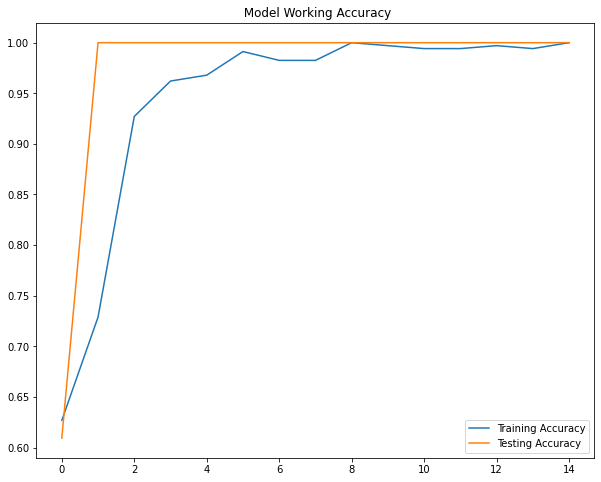

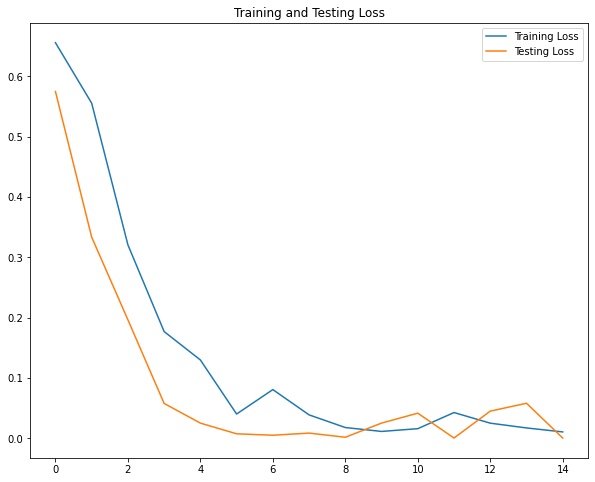

In [ ]:
epochs=15
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(10, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title(' Model Working Accuracy')
plt.show()
plt.figure(figsize=(10, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()


Predicted fruit is an Orange Fruit


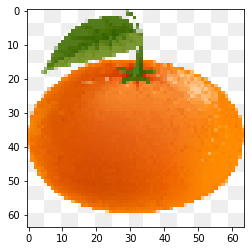

In [ ]:
#training_set.class_indices
p=r"/content/drive/MyDrive/Mini_Dataset/Orange training-20210511T103234Z-001/Orange training/oranges/mandarin-transparent-png-clip-art-5a3c5ab1ced6c1.6350336315139048178472.jpg"
t= image.load_img(p, target_size = (64, 64))
test_image = image.img_to_array(t)
test_image = np.expand_dims(test_image, axis = 0)
test_image/= 255.0
result = model.predict(test_image)
if result>0.6:
  prediction = 'Predicted fruit is not Orange Fruit'
else:
  prediction = 'Predicted fruit is an Orange Fruit'
print (prediction)
plt.imshow(t)
plt.show()

In [ ]:
training_set.class_indices

{'oranges': 0, 'papper orange': 1}